# Split_res


In [99]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split #novidade
from sklearn.metrics import mean_squared_error 


In [100]:
def standard(s):
    m=s.mean()
    d=s.std()
    s=(s-m)/d
    return s

Importação do DataSet com  Pandas

In [101]:
df=pd.read_csv('c:\\dados\\cars-uci-linked.csv',sep=';')
df=df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,8,3020,140.0,3449,105,70,1,ford torino


Standardização da feature potência e criação de hps no dataframe

In [102]:
df['hps']=standard(df['horsepower'])

Montagem da Matriz X (como usaremos sklearn, não precisamos da coluna de 1´s)

In [170]:
X=np.zeros((len(df),1))
X[:,0]=df['hps']
y=df['mpg']

array([[0.66328508],
       [1.57258478],
       [1.18288491]])

Criação do modelo de regressão linear

In [203]:
lr1=LinearRegression()

erro médio quadrático na amostra de treinamento

In [204]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=42)
lr1.fit(X_train,y_train)
ye=lr1.predict(X_train)
e_train=mean_squared_error(ye,y_train)
print('erro train :',e_train)

erro train : 23.92991069117238


erro médio quadrático na amostra de testes

In [205]:
yet=lr1.predict(X_test)
e_test=mean_squared_error(yet,y_test)
print('erro test :',e_test)

erro test : 24.556123551125154


Mostre a variação do erro (%) de treino para testes

In [196]:
100*(e_test-e_train)/e_train

2.6168625033096315

Faça agora com Regressão com potência + de quadrado à décima potência da potência, comece criando a matriz X

In [176]:
XP=np.zeros((len(df),10))
for i in range(10):
    XP[:,i]=df['hps']**(i+1)
y=df['mpg']
XP[:2]

array([[6.63285084e-01, 4.39947103e-01, 2.91810351e-01, 1.93553453e-01,
        1.28381118e-01, 8.51532808e-02, 5.64809010e-02, 3.74629392e-02,
        2.48486087e-02, 1.64817115e-02],
       [1.57258478e+00, 2.47302289e+00, 3.88903815e+00, 6.11584220e+00,
        9.61768036e+00, 1.51246177e+01, 2.37847437e+01, 3.74035259e+01,
        5.88202155e+01, 9.24997755e+01]])

Mostre os erros no dataset de Treinamento e de testes

In [199]:
lr2=LinearRegression()

In [200]:

X_train, X_test, y_train, y_test = train_test_split(
    XP, y, test_size=0.3,random_state=42)
lr2.fit(X_train,y_train)
ye=lr2.predict(X_train)
e_train=mean_squared_error(ye,y_train)
print('erro train :',e_train)

erro train : 16.844105211147614


In [201]:
yet=p2.predict(X_test)
e_test=mean_squared_error(yet,y_test)
print('erro test :',e_test)

erro test : 30.205270240617057


Mostre a variação do erro (%) de treino para testes

In [202]:
100*(e_test-e_train)/e_train

79.32249806078674

Faça o Gráfico Pot X Consumo para os dois modelos para a a mostra toda, além da própria amostra

In [206]:
yp1=lr1.predict(X)
yp2=lr2.predict(XP)

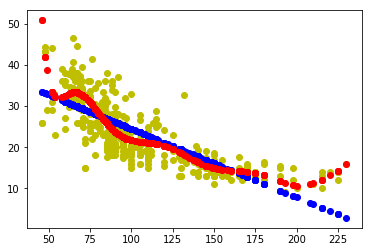

In [212]:
import matplotlib.pyplot as plt
plt.plot(df['horsepower'],df['mpg'],'yo')
plt.plot(df['horsepower'],yp1,'bo')
plt.plot(df['horsepower'],yp2,'ro')
plt.show()